# 7.4.1 Regresión isotónica

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.isotonic import IsotonicRegression

import warnings
warnings.filterwarnings("ignore")

Link: https://youtu.be/v3ktPwo4QS0?si=HGEh-00UwtFcVxTy

Links: https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_isotonic_regression.html

Esta es una técnica para construir modelos de regresión unidimensionales, la cual resuelve el siguiente problema:

$$ \min \ \sum_{i}^{} w_i (y_i - \hat{y_i})^2 $$

con: 

$ \hat{y_i} \leq \hat{y_j} $

$ x_i \leq x_j $

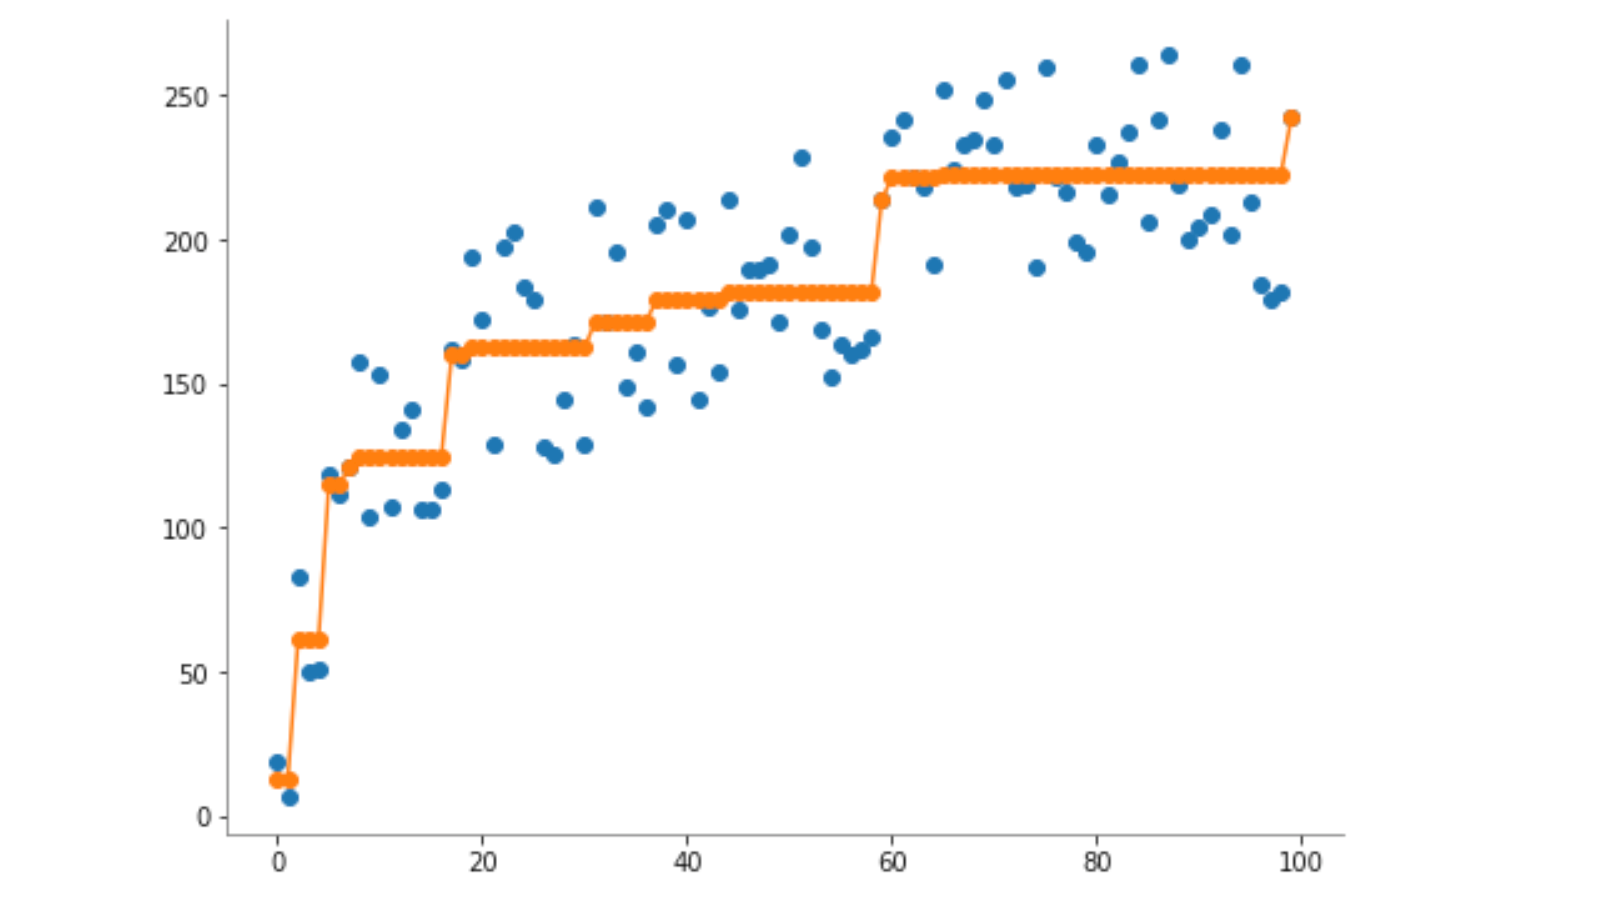

con: 

$ w_i > 0 $

El modelo produce las predicciones puntuales $\hat{y_i}$ para el conjunto de entrenamiento suministrado. <br>
El modelo realiza la interpolación para valores de $x$ que no han sido vistos antes. <br>
Las predicciones del modelo generan una función lineal por tramos.

In [3]:
n_points = 100
x_values = np.arange(n_points)

seed = 12345
rng = np.random.default_rng(seed)
y_values = rng.integers(-50, 50, size=(n_points,)) + 50.0 * np.log1p(
    np.arange(n_points)
)

In [4]:
isotonicRegression = IsotonicRegression(
    # --------------------------------------------------------------------------
    # Lower bound on the lowest predicted value (the minimum value may still be
    # higher). If not set, defaults to -inf.
    y_min=None,
    # --------------------------------------------------------------------------
    # Upper bound on the highest predicted value (the maximum may still be
    # lower). If not set, defaults to +inf.
    y_max=None,
    # --------------------------------------------------------------------------
    # Determines whether the predictions should be constrained to increase or
    # decrease with X. ‘auto’ will decide based on the Spearman correlation
    # estimate’s sign.
    increasing=True,
    # --------------------------------------------------------------------------
    # Handles how X values outside of the training domain are handled during
    # prediction.
    # * ‘nan’, predictions will be NaN.
    # * ‘clip’, predictions will be set to the value corresponding to the
    #   nearest train interval endpoint.
    # * ‘raise’, a ValueError is raised.
    out_of_bounds="clip",
)

isotonicRegression.fit(x_values, y_values)

y_pred = isotonicRegression.transform(x_values)

In [5]:
isotonicRegression.X_min_, isotonicRegression.X_max_

(0.0, 99.0)

In [6]:
isotonicRegression.X_thresholds_

array([ 0.,  1.,  2.,  4.,  5.,  6.,  7.,  8., 16., 17., 18., 19., 30.,
       31., 36., 37., 43., 44., 58., 59., 60., 64., 65., 98., 99.])

In [7]:
isotonicRegression.y_thresholds_

array([ 12.82867951,  12.82867951,  61.23907604,  61.23907604,
       114.94174046, 114.94174046, 120.97207708, 124.89150304,
       124.89150304, 159.87026843, 159.87026843, 162.38474736,
       162.38474736, 171.65324085, 171.65324085, 179.19041925,
       179.19041925, 182.12185904, 182.12185904, 213.71722811,
       221.74413329, 221.74413329, 223.0170862 , 223.0170862 ,
       242.2585093 ])

In [8]:
isotonicRegression.increasing_

True

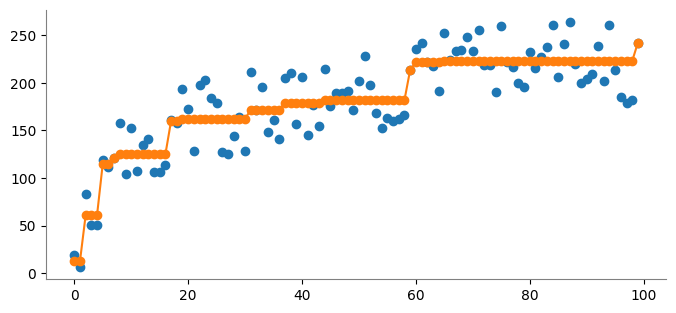

In [9]:
plt.figure(figsize=(8, 3.5))

plt.plot(x_values, y_values, marker=".", color="tab:blue", linestyle="", markersize=12)
plt.plot(x_values, y_pred, marker=".", color="tab:orange", linestyle="-", markersize=12)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

In [10]:
print('ok_')

ok_
